# UNSW Bearing dataset remaining useful life prediction

This jupyter notebook is a part of the Master thesis project "Design and Examination of Predictive Maintenance in Industry 4.0 Environment Using Artificial Intelligence Methods"
The dataset [1] was collected durin run-to-failure experiments, making it possible to predict remaining useful life (RUL)

## Data structure

From the docx attached to the dataset:

### File names
Each data file is named as vib_aaaaaaaaa_bb.mat: <br>
•	aaaaaaaaa: is the running cycle of the shaft in this measurement<br>
•	bb: is the shaft speed in Hz

### Colums
Each data file contains the following variables:<br>
•	Fs: the sampling frequency<br>
•	accH: acceleration (V) in horizontal direction<br>
•	accV: acceleration (V) in vertical direction<br>
•	enc1: encoder signal channel 1 (1024 pulses/rev)<br>
•	enc2: encoder signal channel 2 (1024 pulses/rev)<br>
•	loadCell: the applied radial load on the test bearing<br>
•	tacho: tacho signal of the shaft (1/rev)

In [8]:
import scipy.io as sio
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
fileName = 'vib_000002663_06.mat'
data = sio.loadmat(fileName)

In [3]:
print(data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Nov  2 17:25:32 2021', '__version__': '1.0', '__globals__': [], 'Fs': array([[51200]], dtype=uint16), 'accH': array([[ 0.00614713],
       [ 0.00748862],
       [ 0.00402198],
       ...,
       [-0.00451951],
       [-0.00461838],
       [-0.00435289]]), 'accV': array([[0.01377351],
       [0.01523379],
       [0.02078529],
       ...,
       [0.00070843],
       [0.00198214],
       [0.00330889]]), 'enc1': array([[-0.09608715],
       [ 3.26431537],
       [ 3.95748353],
       ...,
       [ 1.42949522],
       [ 4.70847225],
       [ 4.43558168]]), 'enc2': array([[4.98187876],
       [4.13087177],
       [4.06947136],
       ...,
       [3.52050757],
       [4.93674517],
       [3.74151921]]), 'loadCell': array([[-3.6768322 ],
       [-3.67633915],
       [-3.67665911],
       ...,
       [-3.67911816],
       [-3.67497683],
       [-3.67364192]]), 'tacho': array([[0.00336344],
       [0.00408758],
       [0.00

In [5]:
# Load .mat columns into separate arrays
accH = np.squeeze(data["accH"])
accV = np.squeeze(data["accV"])
enc1 = np.squeeze(data["enc1"])
enc2 = np.squeeze(data["enc2"])
loadCell = np.squeeze(data["loadCell"])
tacho = np.squeeze(data["tacho"])
Fs = np.full(len(accH), data["Fs"])

array = np.array(np.transpose([accH, accV, enc1, enc2, loadCell, tacho, Fs]), dtype=object)
column_names = ['accH', 'accV', 'enc1', 'enc2', 'loadCell', 'tacho', 'Fs']

# Build a dataframe from arrays
df = pd.DataFrame(data = array,
                 columns = column_names)
print(df)

            accH      accV      enc1      enc2  loadCell     tacho       Fs
0       0.006147  0.013774 -0.096087  4.981879 -3.676832  0.003363  51200.0
1       0.007489  0.015234  3.264315  4.130872 -3.676339  0.004088  51200.0
2       0.004022  0.020785  3.957484  4.069471 -3.676659  0.004846  51200.0
3       -0.00045  0.026484  4.389729  0.758216  -3.67912  0.004647  51200.0
4      -0.003118  0.030857  5.114358 -0.143651 -3.678696  0.006372  51200.0
...          ...       ...       ...       ...       ...       ...      ...
614395 -0.008467  0.005719  0.281305  2.233608 -3.688011  0.004164  51200.0
614396 -0.006246  0.005086 -0.356267  4.335676  -3.68364   0.00327  51200.0
614397  -0.00452  0.000708  1.429495  3.520508 -3.679118  0.003882  51200.0
614398 -0.004618  0.001982  4.708472  4.936745 -3.674977   0.00398  51200.0
614399 -0.004353  0.003309  4.435582  3.741519 -3.673642  0.004147  51200.0

[614400 rows x 7 columns]


<IPython.core.display.Javascript object>


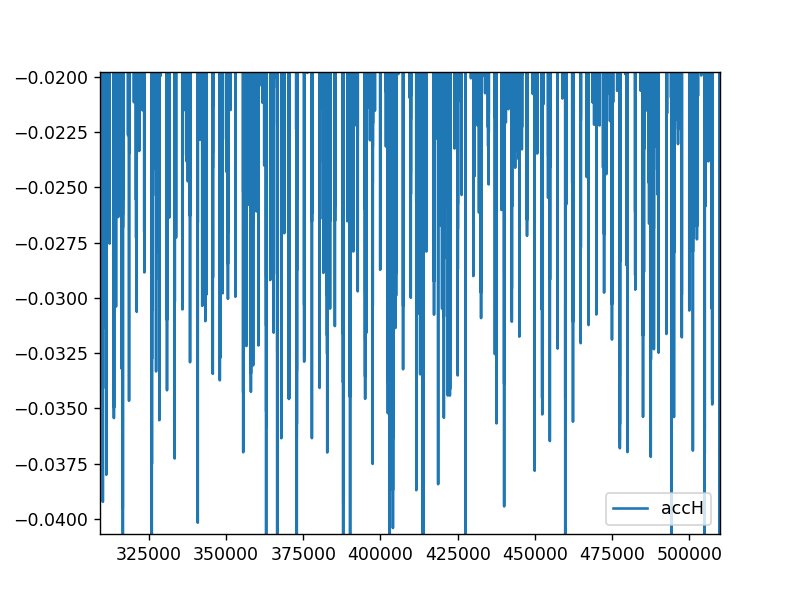

<IPython.core.display.Javascript object>


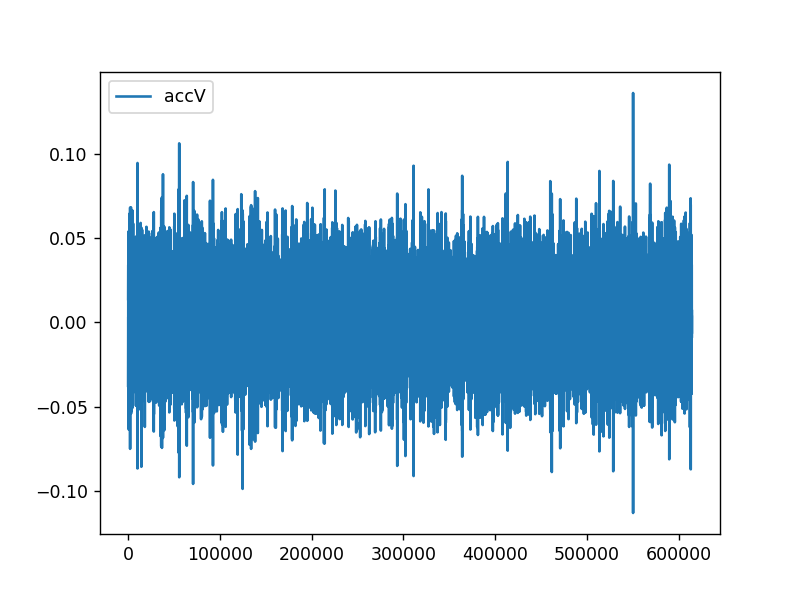

<IPython.core.display.Javascript object>


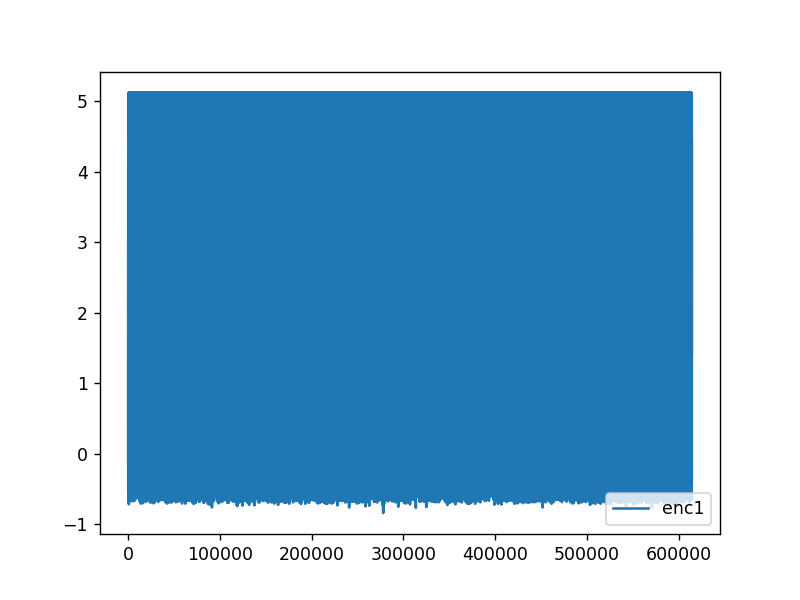

<IPython.core.display.Javascript object>


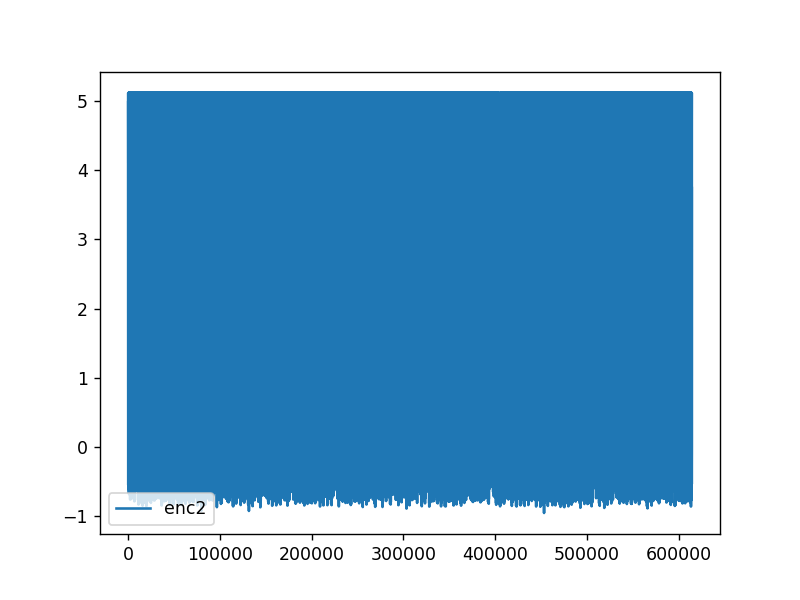

<IPython.core.display.Javascript object>


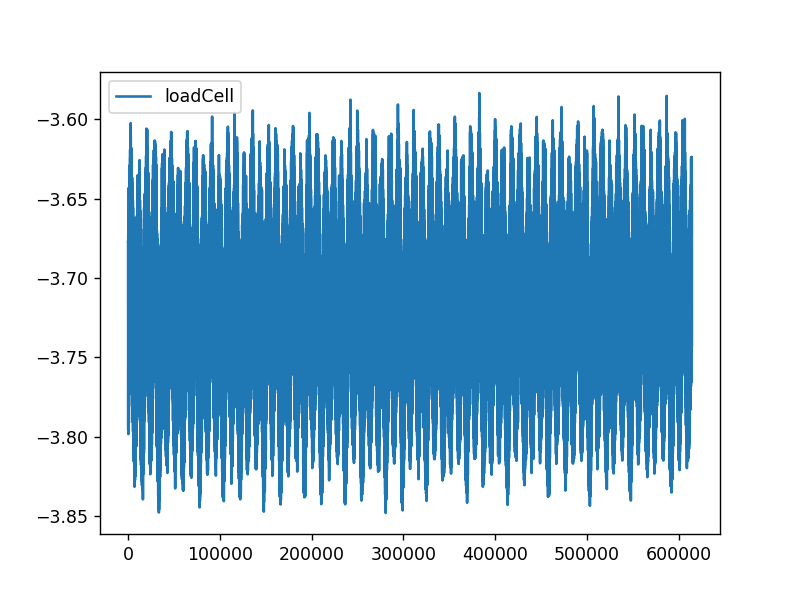

<IPython.core.display.Javascript object>


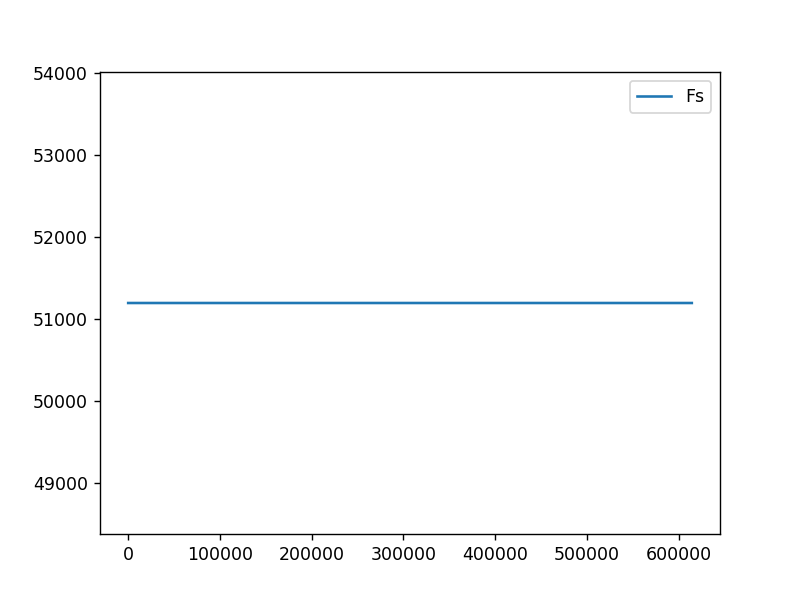

In [9]:
for column in df.columns:
    df.plot(y = column)
    plt.show

[1]: Zhang, Hengcheng; Borghesani, Pietro; Zhuang, Siyuan; Peng, Zhongxiao (2021),
“Bearing run-to-failure datasets of UNSW”, Mendeley Data, V3, doi:
10.17632/h4df4mgrfb.3